<a href="https://colab.research.google.com/github/frasgado/Analisis_Censo_2020/blob/main/01_MapaCenso2020_PoblacionTotal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISIS POBLACION TOTAL**
CENSO 2020

#Instalación de la librería Geopandas.

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 3.9MB/s 
     |████████████████████████████████| 15.3MB 251kB/s 
     |████████████████████████████████| 6.6MB 38.0MB/s 


In [ ]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/CENSO2020/conjunto_de_datos_iter_00_cpv2020.csv') #, index_col=0
df_1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,...,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,...,23887498,2085925,5460133,27527131,34805976,268863,33858339,29541708,1215497,22629812,9652823,33081729,1396774,33564054,1498766,32671764,79584,32979844,16874580,581095,30811260,25610544,16651199,16340788,4227460,7469168,23772973,32031555,13204680,13184550,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,96869,153485,10493,5193,5300,239441,91463,147978,232086,87931,144155,207748,76111,131637,197411,71344,126067,186968,66514,120454,10900,5270,5630,20793,10082,10711,24342,11538,12804,10337,...,31851,7333,16206,38424,48426,13538,45470,8198,16498,34143,13743,44688,9825,47253,14708,35091,4842,43668,24373,5136,38199,26412,13608,30940,15001,13600,36738,40001,5797,3523,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,61324,85801,6798,3407,3391,139757,57628,82129,135028,55256,79772,119223,47543,71680,111530,44275,67255,104612,41184,63428,7028,3511,3517,13506,6574,6932,16724,7679,9045,7693,...,19157,4351,9491,22351,28586,7607,26499,5054,9696,18089,7029,24348,6050,26036,10155,19807,2935,23841,16122,4115,21775,15880,7902,16699,8076,6330,20009,23198,3588,2177,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,1510,2187,165,81,84,3532,1429,2103,3420,1377,2043,3018,1179,1839,2836,1086,1750,2609,987,1622,169,80,89,345,170,175,427,211,216,182,...,531,39,116,646,723,78,694,195,107,608,405,708,27,719,82,610,16,704,203,12,632,561,276,529,216,407,650,684,167,43,732,205,212,48,41,39,62,530,20,*


In [ ]:
# Definition onf new function
def clean_column_names(column_name):
    '''
    Function in charge of clean the column names in and standar camel case format
    '''
    return column_name.lower().strip().replace(' ', '_')


df_1 = df_1.rename(columns=clean_column_names)

In [ ]:
df_nacional = df_1[df_1['nom_loc'] == 'Total nacional']
df_nacional.reset_index(drop=True, inplace=True)
#TotalPoblacion = df_nacional['pobtot'].options.display.float_format

#df_nacional['pobtot'] = df_nacional.apply(lambda x: "{:,}".format(x['pobtot']), axis=1) 
#pd.options.display.float_format = '{:,}'.format


#.astype(str).str.
#= df_nacional[df_nacional['pobtot']]
df_nacional['pobtot']

0    126014024
Name: pobtot, dtype: int64

In [ ]:
df_nacional['pobtot']
#df_nacional['pobtot'] = pd.to_numeric(df_nacional['pobtot'].str.replace(",",""), downcast="float") #Convertir a numéricos
df_nacional['pobtot'] = pd.to_numeric(df_nacional['pobtot'], downcast="float") #Convertir a numéricos
df_nacional['pobtot']

TotalPoblacion = df_nacional.loc[0,'pobtot']

#Aplicar formato en una columna del dataframe
#TotalPoblacion = df_nacional.apply(lambda x: "{:,.0f}".format(x["pobtot"]), axis=1)

#TotalPoblacion = pd.to_numeric(df_nacional['pobtot'], errors='coerce')
#TotalPoblacion = df_nacional['pobtot'].astype('|S80') #where the max length is set at 80 bytes,
#TotalPoblacion = df_nacional['pobtot'].astype('|S') # which will by default set the length to the max len it encounters

print(TotalPoblacion)


126014024.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_1_filtrado = df_1[df_1['nom_loc'] == 'Total de la Entidad']
df_1_filtrado.reset_index(drop=True, inplace=True)
df_1_filtrado

,entidad,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,p_5ymas,p_5ymas_f,p_5ymas_m,p_12ymas,p_12ymas_f,p_12ymas_m,p_15ymas,p_15ymas_f,p_15ymas_m,p_18ymas,p_18ymas_f,p_18ymas_m,p_3a5,p_3a5_f,p_3a5_m,p_6a11,p_6a11_f,p_6a11_m,p_8a14,p_8a14_f,p_8a14_m,p_12a14,...,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aeasp,vph_aguafv,vph_tinaco,vph_cister,vph_excsa,vph_letr,vph_drenaj,vph_nodren,vph_c_serv,vph_ndeaed,vph_dsadma,vph_ndacmm,vph_snbien,vph_refri,vph_lavad,vph_hmicro,vph_autom,vph_moto,vph_bici,vph_radio,vph_tv,vph_pc,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic,tamloc
0,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
1,2,Baja California,0,Total de la entidad Baja California,0,Total de la Entidad,NaN,NaN,NaN,3769020,1868431,1900589,149957,74010,75947,3610844,1790298,1820546,3494500,1732417,1762083,3069620,1524170,1545450,2882498,1432330,1450168,2698908,1342615,1356293,175286,86624,88662,365938,179504,186434,434167,212675,221492,187122,...,798841,59355,189174,892967,1132622,8947,1117719,1069538,23823,122201,71176,1091956,44752,1101573,39745,1085176,3062,1087646,332788,5204,1086226,946647,730313,800176,66156,155157,740452,1071379,576454,576806,1080169,800189,618175,384011,216865,41223,38772,293529,9582,*
2,3,Baja California Sur,0,Total de la entidad Baja California Sur,0,Total de la Entidad,NaN,NaN,NaN,798447,392568,405879,35963,17821,18142,758642,372818,385824,732150,359663,372487,637296,313087,324209,597552,293482,304070,557976,274334,283642,39870,19707,20163,81476,40024,41452,94845,46621,48224,39744,...,154268,31013,38337,168738,235285,2826,226124,210742,11973,195709,64637,230755,5610,231864,6170,220917,450,229382,73154,1493,219805,164034,115666,161315,18099,28452,142908,214312,108948,91750,226517,148723,136538,67961,36197,14508,8675,77223,2608,*
3,4,Campeche,0,Total de la entidad Campeche,0,Total de la Entidad,NaN,NaN,NaN,928363,471424,456939,45541,22506,23035,878528,446774,431754,845134,430162,414972,730335,373837,356498,682951,350650,332301,637189,328098,309091,50104,24850,25254,98089,48087,50002,112766,55251,57515,47384,...,142732,38000,57062,163902,255453,3516,248625,223034,10343,188401,52939,245200,5610,245656,13279,236503,889,243050,128025,5559,218630,201206,86222,89762,64350,62159,136266,226163,87769,68843,218322,114020,151613,38508,17976,23627,36397,130361,12028,*
4,5,Coahuila de Zaragoza,0,Total de la entidad Coahuila de Zaragoza,0,Total de la Entidad,NaN,NaN,NaN,3146771,1583102,1563669,160368,79095,81273,2980244,1500922,1479322,2860700,1441917,1418783,2475441,1252864,1222577,2316332,1174267,1142065,2157771,1096368,1061403,177691,87469,90222,327112,160589,166523,375447,184431,191016,159109,...,677432,14549,74407,809324,895921,2396,889513,859115,8789,598397,122510,882547,11349,886984,11235,879659,538,880714,321539,2308,870949,780014,574724,554420,67634,167028,642682,863515,367970,372132,824291,519599,443659,195883,124077,17020,46420,332298,5754,*
5,6,Colima,0,Total de la entidad Colima,0,Total de la Entidad,NaN,NaN,NaN,731391,370769,360622,29614,14483,15131,699821,355305,344516,677122,344007,333115,592408,302457,289951,556272,284755,271517,520033,266970,253063,34469,17025,17444,72944,35823,37121,85323,41826,43497,36136,...,152586,11457,42001,172292,224634,1121,224122,218820,1634,168639,56894,224485,255,224708,1039,222876,174,224381,92021,1493,211596,17

In [ ]:
df_1_filtrado['CVEGEO'] = df_1_filtrado['entidad'].astype(str).str.zfill(2)
df_1_filtrado['CVEGEO']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     01
1     02
2     03
3     04
4     05
5     06
6     07
7     08
8     09
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
Name: CVEGEO, dtype: object

In [ ]:
df_1_filtrado = df_1_filtrado[['CVEGEO', 'nom_ent', 'pobtot', 'pobfem', 'pobmas']]
#df_1_filtrado.drop('ENTIDAD', axis=1, inplace=True)
df_1_filtrado
#Datos redondeados
TotalPoblacion
df_1_filtrado['porc_pobtotal'] = df_1_filtrado.groupby(['pobtot'], group_keys=False).apply(lambda g: round((g.pobtot.astype(float) * 100/TotalPoblacion),2)) 
df_1_filtrado['mujeres'] = df_1_filtrado.groupby(['pobfem','pobtot'], group_keys=False).apply(lambda g: round((g.pobfem.astype(float)/g.pobtot) * 100,2)) 
df_1_filtrado['hombres'] = df_1_filtrado.groupby(['pobmas','pobtot'], group_keys=False).apply(lambda g: round((g.pobmas.astype(float)/g.pobtot) * 100,2)) 
df_1_filtrado['TotalPoblacion'] = TotalPoblacion
#df_1_filtrado_2 = df_1_filtrado[['CVEGEO', 'nom_ent', 'mujeres', 'hombres']]
df_1_filtrado_2 = df_1_filtrado[['CVEGEO', 'nom_ent', 'pobfem', 'pobmas', 'pobtot', 'porc_pobtotal','mujeres','hombres', 'TotalPoblacion']]
df_1_filtrado_2

# Guarda datos en CSV
#df_1_filtrado_2.to_csv('resumen_poblaciontotal.csv', header=True, index=False)
#print('Archivo guardado en formato *.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,CVEGEO,nom_ent,pobfem,pobmas,pobtot,porc_pobtotal,mujeres,hombres,TotalPoblacion
0,01,Aguascalientes,728924,696683,1425607,1.13,51.13,48.87,126014024.0
1,02,Baja California,1868431,1900589,3769020,2.99,49.57,50.43,126014024.0
2,03,Baja California Sur,392568,405879,798447,0.63,49.17,50.83,126014024.0
3,04,Campeche,471424,456939,928363,0.74,50.78,49.22,126014024.0
4,05,Coahuila de Zaragoza,1583102,1563669,3146771,2.50,50.31,49.69,126014024.0
5,06,Colima,370769,360622,731391,0.58,50.69,49.31,126014024.0
6,07,Chiapas,2837881,2705947,5543828,4.40,51.19,48.81,126014024.0
7,08,Chihuahua,1888047,1853822,3741869,2.97,50.46,49.54,126014024.0
8,09,Ciudad de México,4805017,4404927,9209944,7.31,52.17,47.83,126014024.0
9,10,Durango,927784,904866,1832650,1.45,50.63,49.37,126014024.0


In [ ]:
#df_1_filtrado_2 = df_1_filtrado[['CVEGEO', 'nom_ent', 'pobtot', 'porc_pobtotal']]
df_1_filtrado_2["porc_pobtotal"].sum() 


99.99000000000001

In [ ]:
df_1_filtrado_2["pobtot"].sum() 


126014024

In [ ]:
df_1_filtrado_2

,CVEGEO,nom_ent,pobfem,pobmas,pobtot,porc_pobtotal,mujeres,hombres,TotalPoblacion
0,01,Aguascalientes,728924,696683,1425607,1.13,51.13,48.87,126014024.0
1,02,Baja California,1868431,1900589,3769020,2.99,49.57,50.43,126014024.0
2,03,Baja California Sur,392568,405879,798447,0.63,49.17,50.83,126014024.0
3,04,Campeche,471424,456939,928363,0.74,50.78,49.22,126014024.0
4,05,Coahuila de Zaragoza,1583102,1563669,3146771,2.50,50.31,49.69,126014024.0
5,06,Colima,370769,360622,731391,0.58,50.69,49.31,126014024.0
6,07,Chiapas,2837881,2705947,5543828,4.40,51.19,48.81,126014024.0
7,08,Chihuahua,1888047,1853822,3741869,2.97,50.46,49.54,126014024.0
8,09,Ciudad de México,4805017,4404927,9209944,7.31,52.17,47.83,126014024.0
9,10,Durango,927784,904866,1832650,1.45,50.63,49.37,126014024.0


In [ ]:
#tab_df = df_1_filtrado_2.groupby(['pobtot']).size().reset_index(name="count")
tab_df = df_1_filtrado_2.sort_values(by=['pobtot'], ascending=False)
tab_df = tab_df.reset_index()
tab_df.drop('index', axis=1, inplace=True)
tab_df


,CVEGEO,nom_ent,pobfem,pobmas,pobtot,porc_pobtotal,mujeres,hombres,TotalPoblacion
0,15,México,8741123,8251295,16992418,13.48,51.44,48.56,126014024.0
1,09,Ciudad de México,4805017,4404927,9209944,7.31,52.17,47.83,126014024.0
2,14,Jalisco,4249696,4098455,8348151,6.62,50.91,49.09,126014024.0
3,30,Veracruz de Ignacio de la Llave,4190805,3871774,8062579,6.40,51.98,48.02,126014024.0
4,21,Puebla,3423163,3160115,6583278,5.22,52.00,48.00,126014024.0
5,11,Guanajuato,3170480,2996454,6166934,4.89,51.41,48.59,126014024.0
6,19,Nuevo León,2893492,2890950,5784442,4.59,50.02,49.98,126014024.0
7,07,Chiapas,2837881,2705947,5543828,4.40,51.19,48.81,126014024.0
8,16,Michoacán de Ocampo,2442505,2306341,4748846,3.77,51.43,48.57,126014024.0
9,20,Oaxaca,2157305,1974843,4132148,3.28,52.21,47.79,126014024.0


In [ ]:
#Importar shape

totalPoblacion = gpd.read_file('/content/drive/MyDrive/CENSO2020/00ent.shp')
#Pegar datos al shape
totalPoblacion = totalPoblacion.merge(df_1_filtrado_2, how="left",on="CVEGEO")



#Análisis con cuartiles

In [ ]:
pip install pysal


     |████████████████████████████████| 2.4MB 3.9MB/s 
     |████████████████████████████████| 112kB 21.4MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 215kB 19.8MB/s 
     |████████████████████████████████| 5.7MB 19.1MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 153kB 45.4MB/s 
     |████████████████████████████████| 235kB 31.2MB/s 
     |████████████████████████████████| 235kB 48.9MB/s 
     |████████████████████████████████| 57.4MB 69kB/s 
     |████████████████████████████████| 1.0MB 38.9MB/s 
     |████████████████████████████████| 19.1MB 1.3MB/s 
     |████████████████████████████████| 2.0MB 28.8MB/s 
     |████████████████████████████████| 40.6MB 96kB/s 
     |█

In [ ]:
import seaborn
import pandas
import geopandas
import pysal
import numpy
import mapclassify
import matplotlib.pyplot as plt

ei5 = mapclassify.EqualInterval(totalPoblacion['porc_pobtotal'], k=5)
ei5

EqualInterval         

   Interval      Count
----------------------
[ 0.58,  3.16] |    22
( 3.16,  5.74] |     6
( 5.74,  8.32] |     3
( 8.32, 10.90] |     0
(10.90, 13.48] |     1

In [ ]:
msd = mapclassify.StdMean(totalPoblacion['porc_pobtotal'])
msd


StdMean               

   Interval      Count
----------------------
( -inf, -2.08] |     0
(-2.08,  0.52] |     0
( 0.52,  5.73] |    28
( 5.73,  8.33] |     3
( 8.33, 13.48] |     1

In [ ]:
mb5 = mapclassify.MaximumBreaks(totalPoblacion['porc_pobtotal'], k=5)
mb5


MaximumBreaks         

   Interval      Count
----------------------
[ 0.58,  4.08] |    24
( 4.08,  5.81] |     4
( 5.81,  6.96] |     2
( 6.96, 10.39] |     1
(10.39, 13.48] |     1

In [ ]:
ties = mapclassify.Quantiles(totalPoblacion['porc_pobtotal'], k=5)
ties

Quantiles             

   Interval      Count
----------------------
[ 0.58,  1.32] |     7
( 1.32,  2.04] |     6
( 2.04,  2.81] |     6
( 2.81,  4.55] |     6
( 4.55, 13.48] |     7

#**Mapa Segmentado por Porcentaje de Población Total**

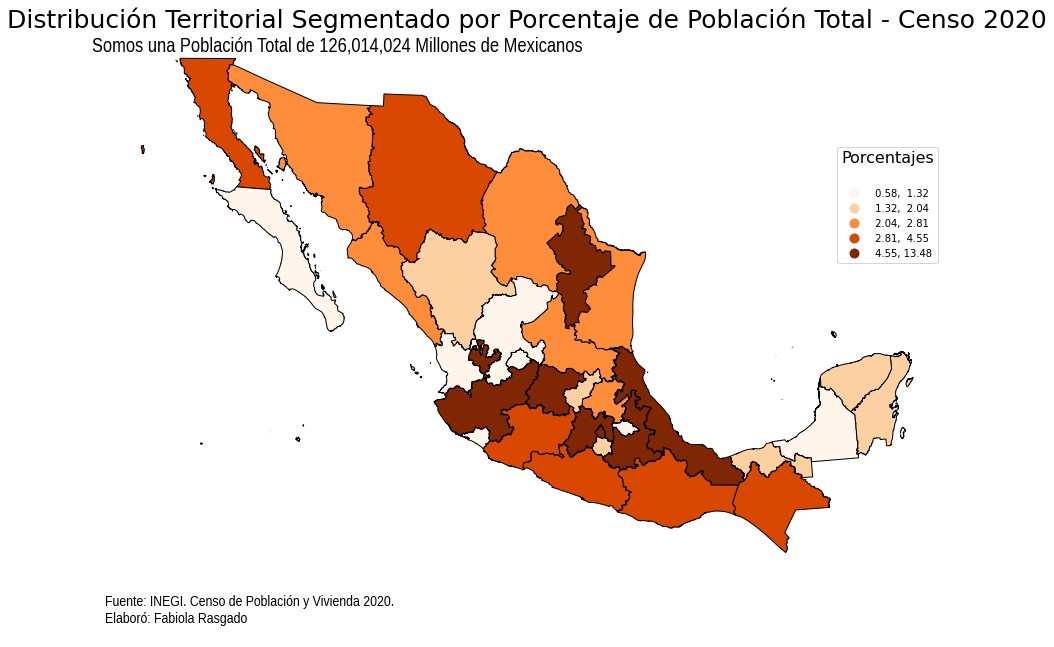

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.ticker as ticker


#creando una figura en matplotlib y ajustando el tamaño deseado 
fig , ax = plt.subplots(1 ,figsize = (16,10))

# Título
ax.set_title('Distribución Territorial Segmentado por Porcentaje de Población Total - Censo 2020', fontsize = 25)

# Subtítulo 
ax.text(x=0.71e6, 
        y=2.38e6,
        s=f'Somos una Población Total de {TotalPoblacion:,.0f} Millones de Mexicanos',
        fontsize=20,
        fontname= "Liberation Sans Narrow", #"Century Gothic",
        color='black')

totalPoblacion.plot(
    ax=ax, 
    column='porc_pobtotal', 
    legend=True, 
    scheme='Quantiles', 
    cmap='Oranges',
    edgecolor='k') 


ax.annotate("Fuente: INEGI. Censo de Población y Vivienda 2020.\nElaboró: Fabiola Rasgado",
            xy=(0.1, .08), 
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=15, 
            color="black",
            fontname="Liberation Sans Narrow")


leg = ax.get_legend()
leg.set_bbox_to_anchor((0.99,0.8))
leg.set_title('Porcentajes\n', prop={'size': 16})
leg.set_animated(True)

ax.axis('off') 

plt.savefig("03_mapa_poblaciontotal.png",
            format="png",dpi=300,transparent=False)

plt.show()




---



#**Mapa por Número de Habitantes**

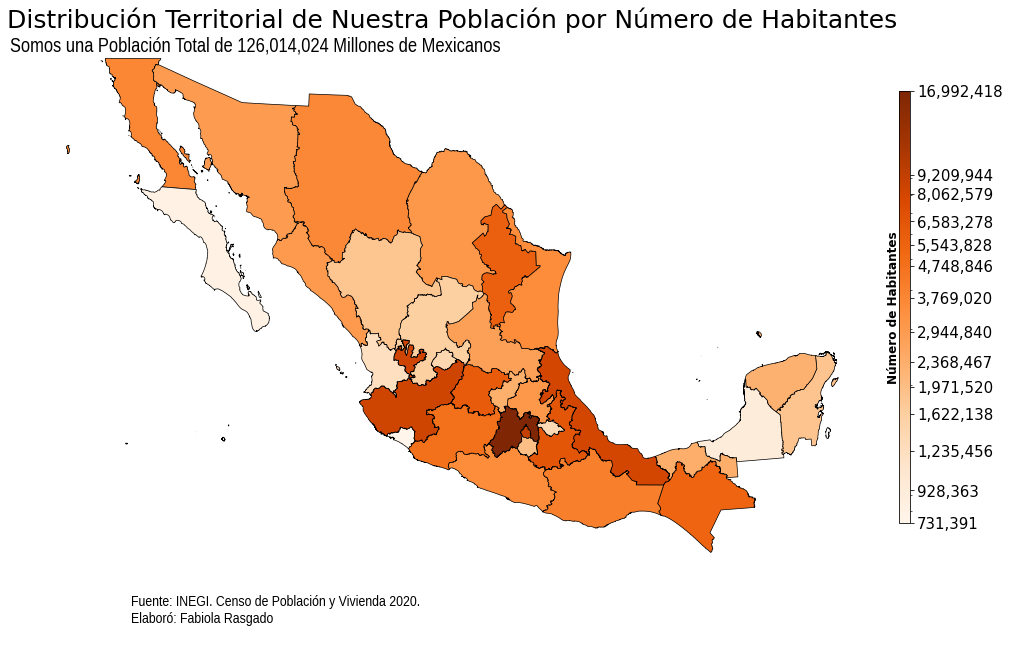

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.ticker as ticker


#creando una figura en matplotlib y ajustando el tamaño deseado 
fig , ax = plt.subplots(1 ,figsize = (16,10))

ax.set_title('Distribución Territorial de Nuestra Población por Número de Habitantes', fontsize = 25)

# Subtítulo 
ax.text(x=0.68e6, 
        y=2.38e6,
        s=f'Somos una Población Total de {TotalPoblacion:,.0f} Millones de Mexicanos',
        fontsize=20,
        fontname= "Liberation Sans Narrow", #"Century Gothic",
        color='black')

totalPoblacion.plot(
    column='pobtot',
    legend = False, 
    cmap ='Oranges',
    ax = ax,
    norm = mplc.LogNorm(), #utilizando el logaritmo de la variable
    linewidth = 0.70, #ajustando el grosor de las lineas del mapa
    edgecolor ='black', #color de las lineas del mapa
    )


vmin = totalPoblacion.pobtot.min()
vmax = totalPoblacion.pobtot.max()

#agregando barra de color atraves de matplotlib

#ajustando posición y dimensiones de la barra
cax = fig.add_axes([0.9, 0.2, 0.01, 0.6]) 

#atributos de la barra de color
sm = plt.cm.ScalarMappable(
                      cmap = 'Oranges', 
                      norm = mplc.LogNorm(vmin = vmin, vmax = vmax)
                      )
sm._A = []

#formateando los números a absolutos de lo contrario salieran a base 10 
#formatter = ticker.LogFormatter(10, labelOnlyBase=False) 

from matplotlib.ticker import FuncFormatter
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

formatter = comma_fmt


# add colorbar
cbr = fig.colorbar(
                  sm, 
                  cax = cax, 
                  format = formatter, #2320898, 2402598, 3563460, 5543828,
                  ticks = [731391,928363,1235456,1622138, 1971520, 2368467, 2944840, 3769020,4748846,5543828,6583278,8062579,9209944, 16992418]
                  )

# add label for the colorbar
cbr.set_label('Número de Habitantes', size='large', weight='bold', labelpad=-116)
cbr.ax.tick_params(labelsize = 15,direction='out') #tamaño de letra de las leyendas

ax.annotate("Fuente: INEGI. Censo de Población y Vivienda 2020.\nElaboró: Fabiola Rasgado",
            xy=(0.13, .08), 
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=15, 
            color="black",
            fontname="Liberation Sans Narrow")

ax.axis('off') 

plt.savefig("01_mapa_poblaciontotal.png",
            format="png",dpi=300,transparent=False)

plt.show()

#**Mapa por Porcentaje de Población Total**

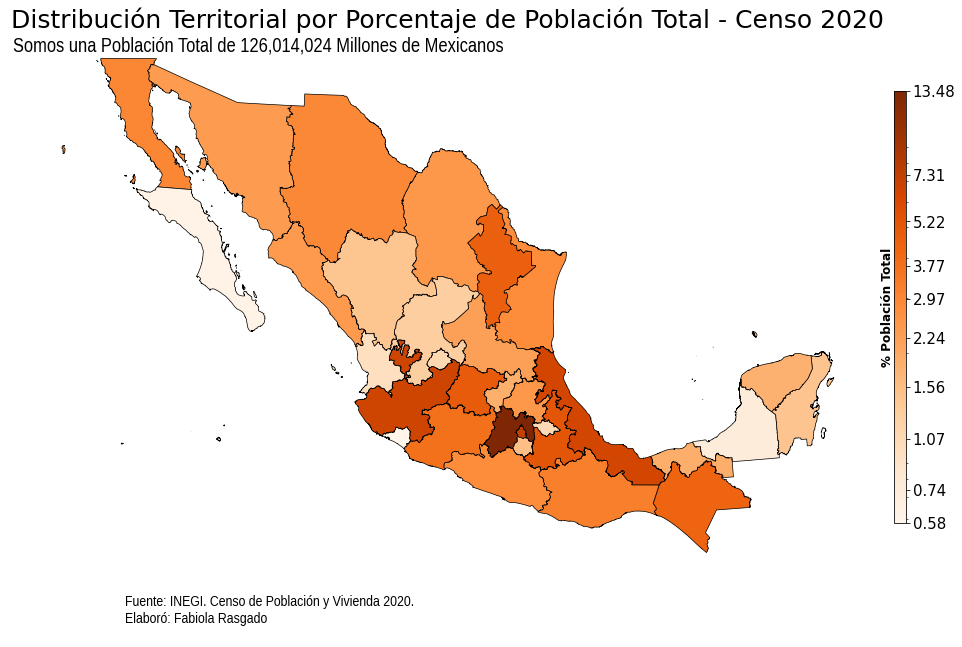

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.ticker as ticker


#creando una figura en matplotlib y ajustando el tamaño deseado 
fig , ax = plt.subplots(1 ,figsize = (16,10))

#En 2020, nuestra población  se distribuye
#nuestra población está distribuido territorialmente
#Distribución territorial de nuestra población por número de habitantes.
ax.set_title('Distribución Territorial por Porcentaje de Población Total - Censo 2020', fontsize = 25)

# Subtítulo 
ax.text(x=0.71e6, y=2.38e6,
        s=f'Somos una Población Total de {TotalPoblacion:,.0f} Millones de Mexicanos',
        fontsize=20,
        fontname= "Liberation Sans Narrow", 
        color='black')
        )

totalPoblacion.plot(
    column='porc_pobtotal',
    legend = False, 
    cmap ='Oranges',
    ax = ax,
    norm = mplc.LogNorm(), #utilizando el logaritmo de la variable
    linewidth = 0.70, #ajustando el grosor de las lineas del mapa
    edgecolor ='black', #color de las lineas del mapa
    )


vmin = totalPoblacion.porc_pobtotal.min()
vmax = totalPoblacion.porc_pobtotal.max()

#agregando barra de color atraves de matplotlib

#ajustando posición y dimensiones de la barra
cax = fig.add_axes([0.9, 0.2, 0.01, 0.6]) 

#atributos de la barra de color
sm = plt.cm.ScalarMappable(
                      cmap = 'Oranges', 
                      norm = mplc.LogNorm(vmin = vmin, vmax = vmax)
                      )
sm._A = []


#formateando los números a absolutos de lo contrario salieran a base 10 
formatter = ticker.LogFormatter(100, labelOnlyBase=True) 


formatter = '%.2f'
cbr = fig.colorbar(
                  sm, 
                  cax = cax, 
                  format = formatter, #1.91, 3.28, 4.40, 4.89, 6.62,
                  ticks = [vmin, 0.74,1.07,1.56,  2.24, 2.97, 3.77,  5.22,  7.31, vmax]
                  )

# add label for the colorbar
cbr.set_label('% Población Total', size='large', weight='bold', labelpad=-75)
cbr.ax.tick_params(labelsize = 15,direction='out') #tamaño de letra de las legendas

ax.annotate("Fuente: INEGI. Censo de Población y Vivienda 2020.\nElaboró: Fabiola Rasgado",
            xy=(0.13, .08), 
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=15, 
            color="black",
            fontname="Liberation Sans Narrow")

ax.axis('off') 

plt.savefig("02_mapa_poblaciontotal.png",
            format="png",dpi=300,transparent=False)

plt.show()